<a href="https://colab.research.google.com/github/AishaEvering/ML_Models_From_Scratch/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN Model From Scratch

In [1]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper.py").is_file():
  print("helper.py already exists, skipping download...")
else:
  print("Downloading helper.py")
  request = requests.get('https://raw.githubusercontent.com/AishaEvering/ML_Models_From_Scratch/main/helper.py')

  with open("helper.py", "wb") as f:
    f.write(request.content)

In [2]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from helper import accuracy

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## Load Data

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [6]:
X_train[0], y_train[0]

(array([4.6, 3.6, 1. , 0.2]), 0)

In [7]:
np.unique(y_train)

array([0, 1, 2])

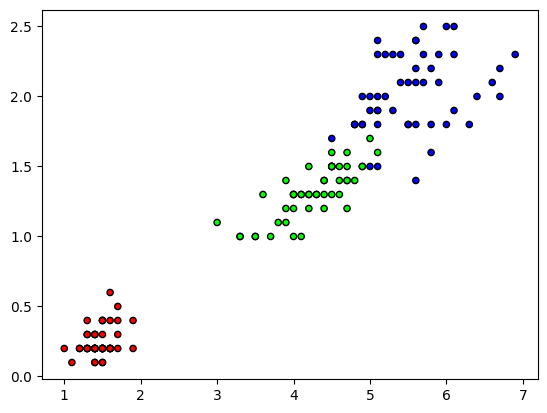

In [8]:
plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolors='k', s=20)
plt.show()

## Create KNN Model

KNN finds the nearest neighbors using the eculiean distance and then takes the majority class of the neighbors to classify the point in question.

**Euclidean distance**

$\sqrt{\displaystyle\sum_{i=1}^n (q_i - p_i)^2}$


In [9]:
# taking readability over effieciency for clear understanding
def euclidean_distance(x1, x2):
  # get the squared difference between samples
  squared_dif = (x1-x2)**2

  # get the sum of all the differences
  sum_of_squared_difs = np.sum(squared_dif)

  # square the sum of all the square differences
  sqrt_of_sum = np.sqrt(sum_of_squared_difs)

  return sqrt_of_sum

In [10]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    # compute distances
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    # get k nearest samples, labels
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # majority vote, most common class lable
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]


In [11]:
a = [1, 1, 1, 2, 2, 3, 4, 5, 6]
most_common = Counter(a).most_common(1)
print(f'Most common: {most_common[0][0]}, Number of instances: {most_common[0][1]}')

Most common: 1, Number of instances: 3


In [12]:
a = [1, 2, 1, 2, 1, 2, 3, 4, 5, 6]
most_common = Counter(a).most_common(1)
print(most_common)

[(1, 3)]


## Fit and Train KNN Model

In [13]:
clf_model = KNN(k=7) # usually you want to use an odd number so no ties
clf_model.fit(X_train, y_train)

## Predict

In [14]:
predictions = clf_model.predict(X_test)

In [15]:
acc = accuracy(y_test, predictions)
print(f'Accuracy: {acc:.3f}')

Accuracy: 0.967


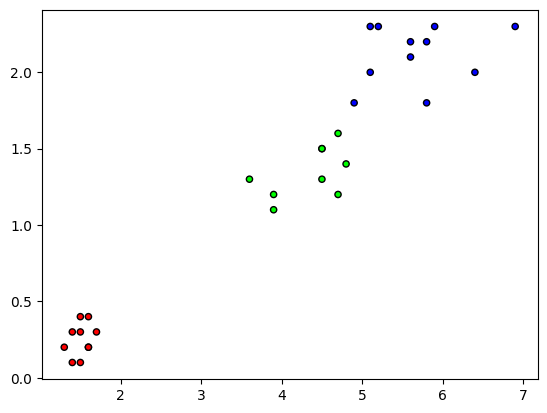

In [16]:
plt.figure()
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap=cmap, edgecolors='k', s=20)
plt.show()

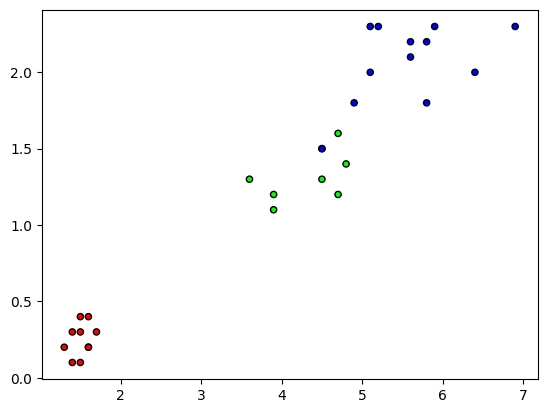

In [17]:
plt.figure()
plt.scatter(X_test[:, 2], X_test[:, 3], c=predictions, cmap=cmap, edgecolors='k', s=20)
plt.show()